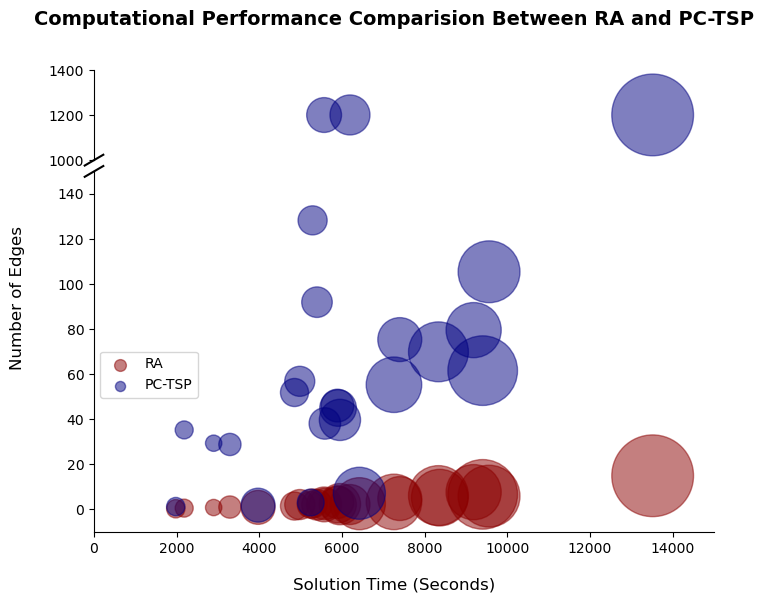

In [102]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

# Load results
results_file = 'results_table.csv'
results = pd.read_csv(results_file)

# Define the break range
break_min, break_max = 150, 800 

# Filter data separately for RA and PC-TSP
filtered_low_RA = results[results['RA'] <= break_min][['Edges', 'RA', 'Cycles']]
filtered_high_RA = results[results['RA'] >= break_max][['Edges', 'RA', 'Cycles']]

filtered_low_PCTSP = results[results['PCTSP'] <= break_min][['Edges', 'PCTSP', 'Cycles']]
filtered_high_PCTSP = results[results['PCTSP'] >= break_max][['Edges', 'PCTSP', 'Cycles']]

# Define figure and subplots with adjusted height ratios
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6),
                               gridspec_kw={'height_ratios': [1, 4]})  # Upper = 20%, Lower = 80%

# Remove space between subplots
fig.subplots_adjust(hspace=0.05)

# Plot RA results
ax1.scatter(filtered_high_RA['Edges'], filtered_high_RA['RA'], color='darkred', label='RA', s=filtered_high_RA['Cycles']/2, alpha=0.5)
ax2.scatter(filtered_low_RA['Edges'], filtered_low_RA['RA'], color='darkred', label='RA', s=filtered_low_RA['Cycles']/2, alpha=0.5)

# Plot PC-TSP results
ax1.scatter(filtered_high_PCTSP['Edges'], filtered_high_PCTSP['PCTSP'], color='navy', label='PC-TSP', s=filtered_high_PCTSP['Cycles']/2, alpha=0.5)
ax2.scatter(filtered_low_PCTSP['Edges'], filtered_low_PCTSP['PCTSP'], color='navy', label='PC-TSP', s=filtered_low_PCTSP['Cycles']/2, alpha=0.5)

ax1.set_xlim(0, 15000)
ax2.set_xlim(0, 15000)
ax2.set_ylim(-10, 150)
ax1.set_ylim(1000, 1400)

# Add break markers
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False, right=False)  
ax2.xaxis.tick_bottom()
ax1.tick_params(top=False, right=False)

# Add diagonal break lines only on the left
d = 0.015  # Size of the diagonal line markers
kwargs = dict(transform=ax1.transAxes, color='black', clip_on=False)
ax1.plot((-d, +d), (-4*d, 4*d), **kwargs)  # Left-top diagonal
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Left-top diagonal for ax2


# Remove only the top and right borders
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Show the plot
ax2.legend(loc="upper left", bbox_to_anchor=(0.01, 0.5), markerscale=0.2, borderaxespad=0)
fig.supylabel("Number of Edges", fontsize=12)
fig.supxlabel("Solution Time (Seconds)", fontsize=12)
fig.suptitle("Computational Performance Comparision Between RA and PC-TSP", fontsize=14, fontweight='bold')
plt.show()